In [1]:
# Importing recommended libraries
import cv2  
import os
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG16

In [2]:
# Main directory where model data is saved
mainDataDirectory = "C:/Users/seyed/Music/Brain Tumor - Model Data/"

In [3]:
# Categories of image classification
imageCategories = ["No", "Yes"]

# Directories for training and testing data
trainDirectory = os.path.join(mainDataDirectory, 'Train')
testDirectory = os.path.join(mainDataDirectory, 'Test')

In [4]:
# Function to read images from a directory and add labels to each image
def read_images_from_directory(directory):
    images = []
    labels = []
    for imageCategory in imageCategories:
        category_path = os.path.join(directory, imageCategory)
        label = imageCategories.index(imageCategory)
        
        for filename in os.listdir(category_path):
            image_path = os.path.join(category_path, filename)
            image = cv2.imread(image_path)
            if image is not None:
                images.append(image)
                labels.append(label)
            else:
                print(f"Error in reading the image: {image_path}")
    return images, labels

In [5]:
# Read training images
train_images, train_labels = read_images_from_directory(trainDirectory)

# Read testing images
test_images, test_labels = read_images_from_directory(testDirectory)

# Convert the lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [6]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((41518, 256, 256, 3), (41518,), (10380, 256, 256, 3), (10380,))

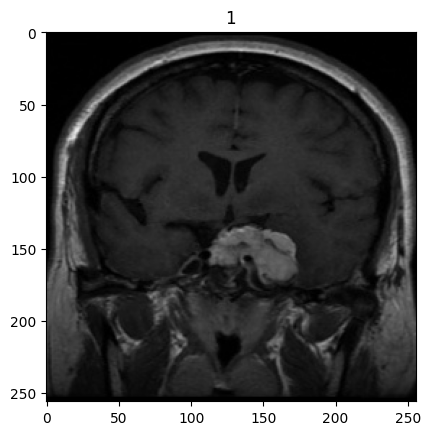

In [7]:
plt.imshow(train_images[25670])
plt.title(train_labels[25670])
plt.show()

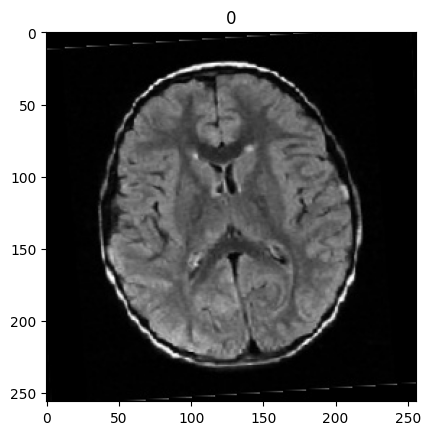

In [8]:
plt.imshow(train_images[20000])
plt.title(train_labels[20000])
plt.show()

In [9]:
# Checking for the number of data
train_images.shape

(41518, 256, 256, 3)

In [10]:
train_labels.shape

(41518,)

In [11]:
test_images.shape

(10380, 256, 256, 3)

In [12]:
yes = 0
no = 0
for lab in train_labels:
    if lab == 0:
        no +=1
    elif lab == 1:
        yes += 1
        

In [13]:
print("Yes: " + str(yes) + " and No: " + str(no))

Yes: 21393 and No: 20125


In [14]:
test_labels.shape

(10380,)

In [15]:
# Checking the categories in the dataset
np.unique(train_labels)

array([0, 1])

In [16]:
train_images.shape

(41518, 256, 256, 3)

In [17]:
test_images.shape

(10380, 256, 256, 3)

In [18]:
train_labels.shape, train_images.shape, test_labels.shape, test_images.shape

((41518,), (41518, 256, 256, 3), (10380,), (10380, 256, 256, 3))

In [19]:
# Encoding the label
label_encoder = LabelEncoder()
train_label_encoded = label_encoder.fit_transform(train_labels)
test_label_encoded = label_encoder.fit_transform(test_labels)

# Convert the encoded labels to one-hot encoding
train_labels_onehot = to_categorical(train_label_encoded, num_classes=2)
test_labels_onehot = to_categorical(test_label_encoded, num_classes=2)

In [20]:
# Check the shape of test labels
print(test_labels_onehot.shape)

(10380, 2)


Text(0.5, 1.0, '0')

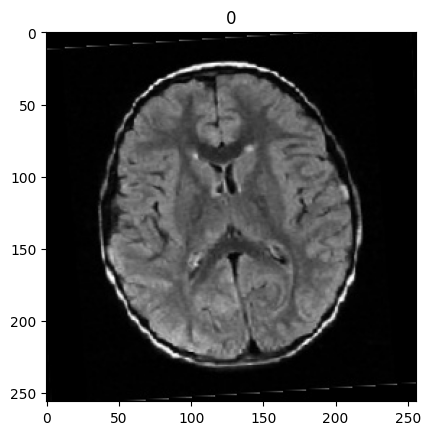

In [21]:
plt.imshow(train_images[20000])
plt.title(np.argmax(train_labels_onehot[20000]))
# plt.show()

Text(0.5, 1.0, '[1. 0.]')

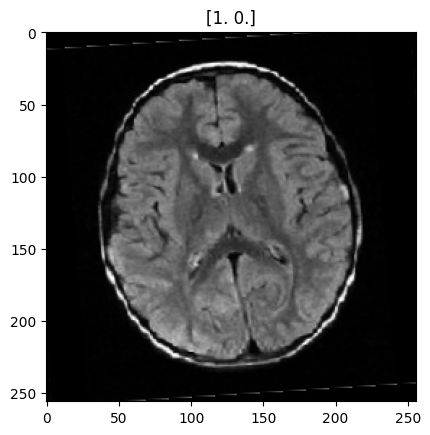

In [22]:
plt.imshow(train_images[20000])
plt.title(train_labels_onehot[20000])

Text(0.5, 1.0, '[0. 1.]')

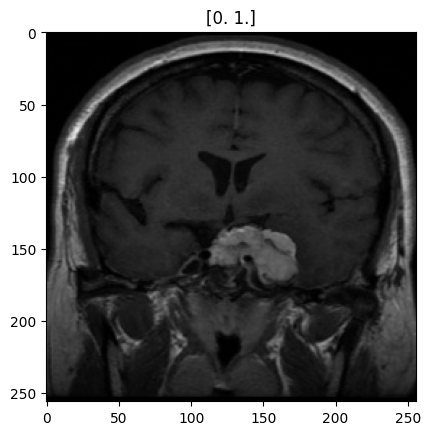

In [23]:
plt.imshow(train_images[25670])
plt.title(train_labels_onehot[25670])
# plt.show()

Text(0.5, 1.0, '1')

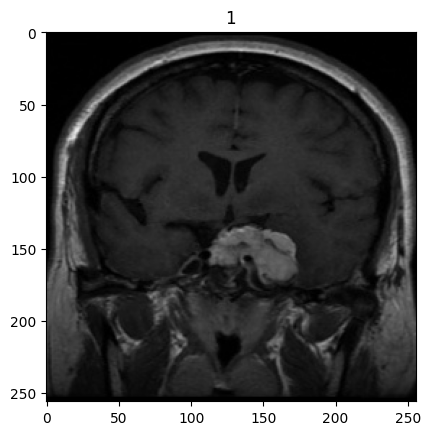

In [24]:
plt.imshow(train_images[25670])
plt.title(np.argmax(train_labels_onehot[25670]))

In [26]:
# Running the tf in cpu
with tf.device('/cpu:0'):
    # Loading the vgg16 model and setting up the image size to train
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

    # Freeze the layers
    for layer in base_model.layers:
        layer.trainable = False
    
    # Update the model architecture
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(2, activation='softmax'))  

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(train_images, train_labels_onehot, epochs=10, batch_size=16, validation_data=(test_images, test_labels_onehot))


Epoch 1/10
2595/2595 [==============================] - 2413s 930ms/step - loss: 0.4656 - accuracy: 0.9291 - val_loss: 0.0461 - val_accuracy: 0.9840
Epoch 2/10
2595/2595 [==============================] - 2379s 917ms/step - loss: 0.1418 - accuracy: 0.9430 - val_loss: 0.0543 - val_accuracy: 0.9818
Epoch 3/10
2595/2595 [==============================] - 2380s 917ms/step - loss: 0.1346 - accuracy: 0.9446 - val_loss: 0.1277 - val_accuracy: 0.9803
Epoch 4/10
2595/2595 [==============================] - 2377s 916ms/step - loss: 0.1084 - accuracy: 0.9526 - val_loss: 0.0405 - val_accuracy: 0.9881
Epoch 5/10
2595/2595 [==============================] - 2377s 916ms/step - loss: 0.1160 - accuracy: 0.9568 - val_loss: 0.0501 - val_accuracy: 0.9911
Epoch 6/10
2595/2595 [==============================] - 2378s 916ms/step - loss: 0.0849 - accuracy: 0.9618 - val_loss: 0.0348 - val_accuracy: 0.9923
Epoch 7/10
2595/2595 [==============================] - 2374s 915ms/step - loss: 0.0924 - accuracy: 0.9620

In [27]:
# Save the model
model.save('C:/Users/seyed/Music/Brain Tumor - Model/TumorDetectionModel_VGG-16.h5')

In [28]:
# Displayed the trained model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 23,104,066
Trainable params: 8,389,378
Non-trainable params: 14,714,688
_________________________________________________________________
